In [1]:
import matplotlib.pyplot as plt
from gaiaxpy import calibrate
import numpy as np

# id = 38655544960  # first entry
# id = 2947050466531872640   # Paper Fig. 22
# id = 2947047202356748672
id = 194912732657384320

# sampling = np.arange(336, 1021, 2)
sampling = np.arange(336, 1021, 10)

data, _ = calibrate([id], sampling=sampling, save_file=False)

<ErrorbarContainer object of 3 artists>

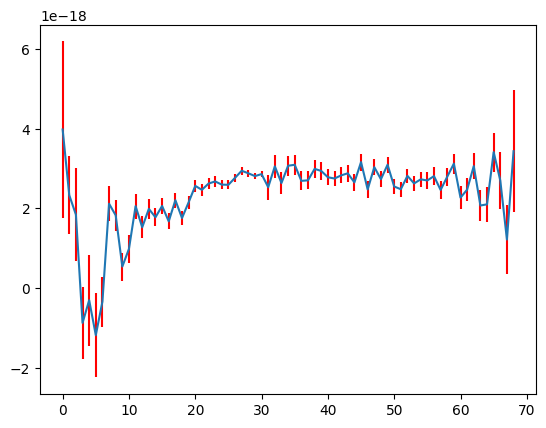

In [2]:
plt.errorbar(
    range(len(data["flux"][0])),
    data["flux"][0],
    yerr=data["flux_error"][0],
    ecolor="red",
)

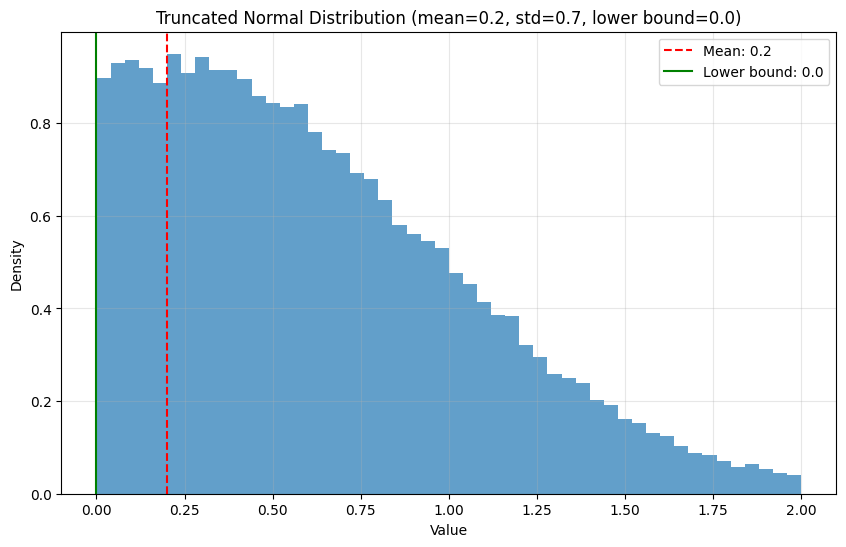

Sample mean: 0.6268
Sample std: 0.4374


In [9]:
import torch

# Create a larger sample of truncated normal values for visualization
num_samples = 100000
samples = torch.empty(num_samples)
mean = 0.2
std = 0.7
lower_bound = 0.0
torch.nn.init.trunc_normal_(samples, mean=mean, std=std, a=lower_bound)

# Create a histogram to visualize the truncated normal distribution
plt.figure(figsize=(10, 6))
plt.hist(samples.numpy(), bins=50, density=True, alpha=0.7)
plt.axvline(x=mean, color="r", linestyle="--", label=f"Mean: {mean}")
plt.axvline(
    x=lower_bound, color="g", linestyle="-", label=f"Lower bound: {lower_bound}"
)
plt.title(
    f"Truncated Normal Distribution (mean={mean}, std={std}, lower bound={lower_bound})"
)
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Sample mean: {samples.mean().item():.4f}")
print(f"Sample std: {samples.std().item():.4f}")

In [37]:
import torch


def truncated_normal(x, mu, sigma, a, b):
    normal = torch.distributions.normal.Normal(0, 1)

    alpha = torch.tensor((a - mu) / sigma)
    beta = torch.tensor((b - mu) / sigma)
    xi = torch.tensor((x - mu) / sigma)

    alpha_normal_cdf = normal.cdf(alpha)
    beta_normal_cdf = normal.cdf(beta)

    return (
        1.0
        / sigma
        * 10 ** normal.log_prob(xi)
        * (beta_normal_cdf - alpha_normal_cdf).reciprocal()
    )


truncated_normal(0.5, mu=0.2, sigma=0.7, a=0, b=1)

tensor(0.2868)

/tmp/ipykernel_355062/1378488001.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  xi = torch.tensor((x - mu) / sigma)


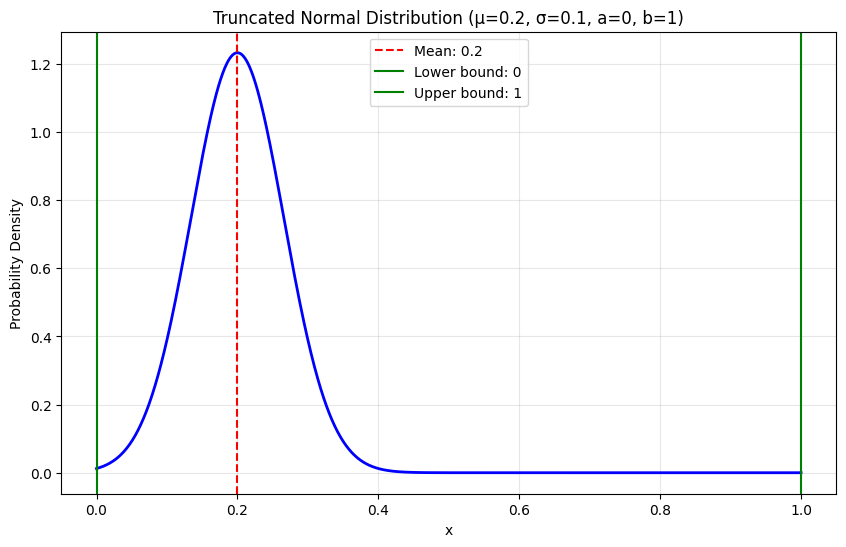

In [ ]:
mu = 0.2
sigma = 0.7
a = 0
b = 1

# Create x values between a and b for plotting
x_values = torch.linspace(0, 1, 1000)

# Calculate truncated normal PDF for each x value
pdf_values = torch.zeros_like(x_values)
for i, x_val in enumerate(x_values):
    pdf_values[i] = truncated_normal(x_val, mu=mu, sigma=sigma, a=a, b=b)

# Plot the truncated normal distribution
plt.figure(figsize=(10, 6))
plt.plot(x_values.numpy(), pdf_values.numpy(), "b-", linewidth=2)
plt.axvline(x=mu, color="r", linestyle="--", label=f"Mean: {mu}")
plt.axvline(x=a, color="g", linestyle="-", label=f"Lower bound: {a}")
plt.axvline(x=b, color="g", linestyle="-", label=f"Upper bound: {b}")
plt.title(f"Truncated Normal Distribution (μ={mu}, σ={sigma}, a={a}, b={b})")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()